# Exercises: Machine Learning

## Problems

1. Fit a Line
2. Momentum
2. Maximization


In [ ]:
from ipywidgets import interact
from fastai.basics import *
import torch
import pandas as pd

# Now we don't need to use plt.show()
%matplotlib inline

# Makes the figure output a bit smaller
plt.rc('figure', dpi=90)

# A helper function to plot generic functions
def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None, xlab=None, ylab=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim is not None: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)
    if xlab is not None: plt.xlabel(xlab)
    if ylab is not None: plt.ylabel(ylab)
    if min is not None: plt.xlim([min,max])
    plt.show()

# 1. Fit a Line

Here is a new dataset, whose data come from a line. Using what you've learned so far, fit a line to it, and make some plots. What are the slope and intercept you find?

In [ ]:
linear_data = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/ml_sampledata_linear.csv")
linear_data.head(3)

,x,y
0,0.922410,2.963345
1,0.820254,1.865758
2,0.025396,-0.113509


In [ ]:
x = torch.tensor(linear_data["x"])
y = torch.tensor(linear_data["y"])

w = torch.rand(2)
w.requires_grad_()
losses = []

def line(w, x):
    return w[0]*x + w[1]

# Define a loss function
def loss(y, yhat):
    return (y-yhat).pow(2).mean()

for epoch in range(5000):
    yhat = line(w, x)
    J = loss(y, yhat)
    losses.append(float(J))
    J.backward()

    lr = 0.01
    with torch.no_grad():
        w.sub_(lr * w.grad)
    w.grad.data.zero_()
w.detach_()

tensor([ 3.3529, -0.3820])

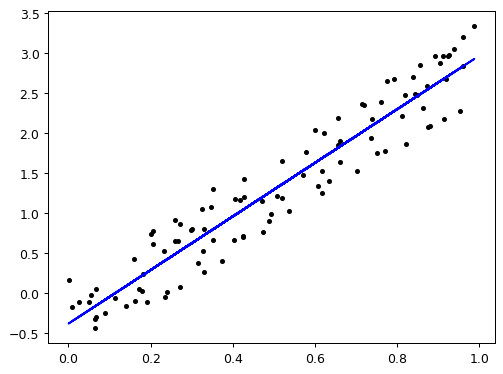

In [ ]:

plt.plot(x,y,".k")
plt.plot(x,line(w,x),'-b')

## 2. Gradient Descent with Momentum

There are a lot of different updates and tweaks that have been made to improve the basic gradient descent algorithm that we coded up in class. One is to add a *momentum* term, which simulates how a ball rolling down a hill will speed up and jump out of little holes. To do this, instead of calculating the new value of $w$ in the way we have been:

$$w' = w - \lambda \frac{\partial J}{\partial w}$$

(where the $w'$ "w-prime" is the new value of $w$)

We make this a two-step process:

$$v' = \beta v + (1-\beta)\frac{\partial J}{\partial w}$$
$$w' = w - \lambda v'$$

* This new term $v$ is the momentum, which is initially set to $0$, and
* $\beta$ is a new hyperparameter, like the learning rate, which is in the range $0\leq\beta<1$.

Before doing an implementation, answer the following:
* For what value of $\beta$ is gradient descent with momentum just the original gradient descent?
* Why did I specify that $\beta<1$ and not $\beta \leq 1$? What would go wrong if you did that?

In [ ]:
#Beta would have to be = to 0


#Becaue V' is a momentum term, and if B is = to 1 then theres no gain or loss in momentum because the partial J with respect to Partial W gets cancelled out from the equation
#The gradient term (tells about the slope) gets erased

Let's say that the gradient/slope of the loss $J$ is a constant: $\frac{\partial J}{\partial w} = 10$. It never changes, even as $w$ changes.

Also, let's choose a learning rate of $\lambda= 0.01$.

What would the graph of $w'$ look like as we go from epoch 0 to epoch 10 if:
* $\beta = 0.01$?
* Or $\beta = 0.99$?
* Make a graph for both.

In [ ]:
x = torch.tensor(linear_data["x"])
y = torch.tensor(linear_data["y"])

w = torch.rand(1)
w.requires_grad_()
losses = []

def line(w, x):
    return w[0] - lr*10

# Define a loss function
def loss(y, yhat):
    return (y-yhat).pow(2).mean()

for epoch in range(10):
    yhat = line(w, x)
    J = loss(y, yhat)
    losses.append(float(J))
    J.backward()

    lr = 0.99
    with torch.no_grad():
        w.sub_(lr * w.grad)
    w.grad.data.zero_()
w.detach_()

tensor([2.3906])

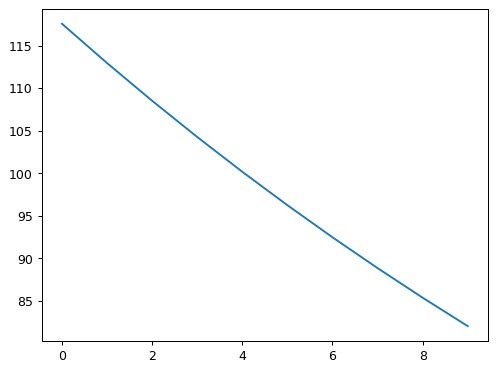

In [ ]:
plt.plot(losses)

Implement gradient descent with momentum, and compare how quickly the algorithm converges to a good answer for the data in Problem 1 when $\beta = 0.01$ and $\beta = 0.99$.

## 3. Maximization Problem

In class, we've been working on the gradient *descent* algorithm, which helps us find the minimum of some function. But that's not what you always want to do. Sometimes you want the highest value of a function, like the maximum score in a game or the highest profit you can get.

Below is the function $f(x) = \ln x - x^2 + \pi$.

Modify our gradient descent algorithm so that you find the value of $x$ that gives you the largest possible $f$.
* What is this value of $x$?
* What is the maximum value of $f$?


In [ ]:
def f(x):
    return torch.log(x)-torch.pow(x,2) + torch.pi

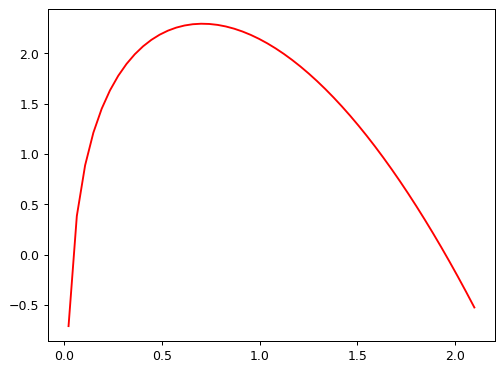

In [ ]:
plot_function(f)

Before you begin work, think very carefully:
* What is the "loss" function here, the thing we want to optimize?
* What are the parameters that you're trying to change?
* Is there any "data" to put into some $x$ and $y$ variable?